In [2]:
from google.colab import files
uploaded = files.upload()


Saving SFR_network_data.csv to SFR_network_data (1).csv


## Je vais maintenat charger les données :

In [3]:
import pandas as pd

df = pd.read_csv("SFR_network_data.csv")
df.head(400)


,antenne_id,date,latence_ms,taux_erreur_%,debit_mbps,temperature_eq°C,etat
0,A001,2025-11-01 00:00:00,57.45,0.76,96.48,42.62,normal
1,A001,2025-11-01 01:00:00,54.19,1.10,84.19,32.37,normal
2,A001,2025-11-01 02:00:00,53.63,0.23,72.75,32.19,normal
3,A001,2025-11-01 03:00:00,43.58,0.58,82.97,24.30,normal
4,A001,2025-11-01 04:00:00,51.01,0.37,84.56,35.55,normal
...,...,...,...,...,...,...,...
395,A003,2025-11-03 11:00:00,37.12,1.14,87.27,31.11,normal
396,A003,2025-11-03 12:00:00,42.86,1.06,92.63,35.97,normal
397,A003,2025-11-03 13:00:00,46.61,1.03,89.34,44.91,normal
398,A003,2025-11-03 14:00:00,71.34,1.08,99.65,41.18,normal


In [4]:
df.sample(10)


,antenne_id,date,latence_ms,taux_erreur_%,debit_mbps,temperature_eq°C,etat
891,A006,2025-11-03 03:00:00,46.19,0.60,90.28,35.52,normal
59,A001,2025-11-03 11:00:00,50.18,1.08,84.77,39.75,normal
264,A002,2025-11-05 00:00:00,39.96,1.11,83.94,44.13,normal
1250,A008,2025-11-04 02:00:00,55.47,0.60,77.16,42.38,normal
1447,A009,2025-11-05 07:00:00,71.11,0.92,98.16,29.71,normal
301,A002,2025-11-06 13:00:00,23.56,0.49,92.47,35.44,normal
1537,A010,2025-11-02 01:00:00,40.94,1.61,85.09,49.93,normal
213,A002,2025-11-02 21:00:00,49.54,1.40,99.63,36.54,normal
921,A006,2025-11-04 09:00:00,50.52,1.40,89.12,42.94,normal
1387,A009,2025-11-02 19:00:00,30.79,0.49,89.35,48.61,normal


##  Statistiques descriptives globales

In [5]:

df.describe()


,latence_ms,taux_erreur_%,debit_mbps,temperature_eq°C
count,1680.000000,1680.000000,1680.000000,1680.000000
mean,60.210756,1.089720,84.763940,37.013333
std,38.254438,1.005002,18.797258,8.106728
min,0.870000,-0.260000,17.450000,19.780000
25%,40.667500,0.630000,80.155000,32.050000
50%,51.350000,0.850000,88.590000,35.690000
75%,63.805000,1.080000,96.340000,39.885000
max,295.150000,7.060000,123.770000,79.470000


# Ce que dit chaque chiffre

* Count = 1680

→ 10 antennes × 7 jours × 24 h = 1680 mesures. Cohérent.

## latence_ms

* mean 60.2 ms ; médiane 51.4 ms ; Q1–Q3 = 40.7–63.8 ms

→ La zone “normale” se situe grosso modo 40–65 ms.

* max 295 ms

→ Pics très élevés = pics de congestion ou incidents (clairement anormaux).

* std 38.3 ms

→ Variabilité assez forte (effet des pics).

* Lecture opérationnelle : on peut poser un seuil d’alerte vers ≥120 ms pour repérer les heures/antennes en souffrance.

## taux_erreur_%

* mean 1.09 %, médiane 0.85 %, Q3 1.08 %, max 7 %

→ Normal autour de 0.6–1.1 %. Au-delà de 2 %, ça commence à impacter le service.

* min −0.26 %

→ Impossible physiquement : petit bruit de mesure/simulation ⇒ à corriger (on tronque à 0).

Lecture opérationnelle : alerte si > 2 %, critique si > 3–4 %.

## debit_mbps

* mean 84.8 Mbps, médiane 88.6 Mbps, Q1–Q3 = 80.2–96.3 Mbps

→ Bon niveau moyen ; normal ≈ 80–96 Mbps.

* min 17.5 Mbps

→ Fortes chutes = saturation ou panne partielle.

Lecture opérationnelle : drapeau si < 50 Mbps (à affiner par site/heure).

## temperature_eq°C

mean 37.0°C, Q1–Q3 = 32.1–39.9°C, max 79.5°C

→ Normal ≈ 32–40°C. > 60°C = surchauffe → risque de panne.

Lecture opérationnelle : alerte > 60°C, critique > 70°C.

##  Nettoyage rapide


In [6]:
df["taux_erreur_%"] = df["taux_erreur_%"].clip(lower=0)


In [7]:
df.describe()

,latence_ms,taux_erreur_%,debit_mbps,temperature_eq°C
count,1680.000000,1680.000000,1680.000000,1680.000000
mean,60.210756,1.090220,84.763940,37.013333
std,38.254438,1.004417,18.797258,8.106728
min,0.870000,0.000000,17.450000,19.780000
25%,40.667500,0.630000,80.155000,32.050000
50%,51.350000,0.850000,88.590000,35.690000
75%,63.805000,1.080000,96.340000,39.885000
max,295.150000,7.060000,123.770000,79.470000


## Visualiser les indicateurs principaux

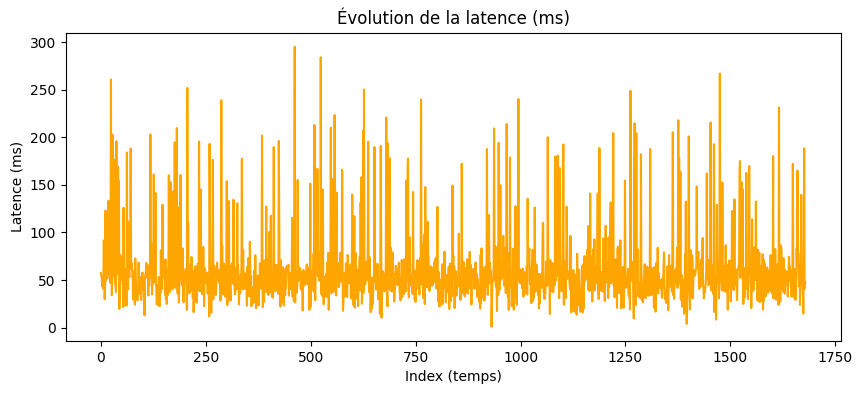

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,4))
plt.plot(df["latence_ms"], color='orange')
plt.title("Évolution de la latence (ms)")
plt.xlabel("Index (temps)")
plt.ylabel("Latence (ms)")
plt.show()






## Interpretation

La latence moyenne du réseau est de 60 ms, ce qui est globalement satisfaisant.
Cependant, des pics récurrents supérieurs à 120 ms ont été observés, atteignant jusqu’à 295 ms.
Ces pics traduisent des congestions ponctuelles ou incidents réseau localisés.
Une analyse par antenne et par créneau horaire permettra d’identifier les zones à fort trafic nécessitant un ajustement de capacité.

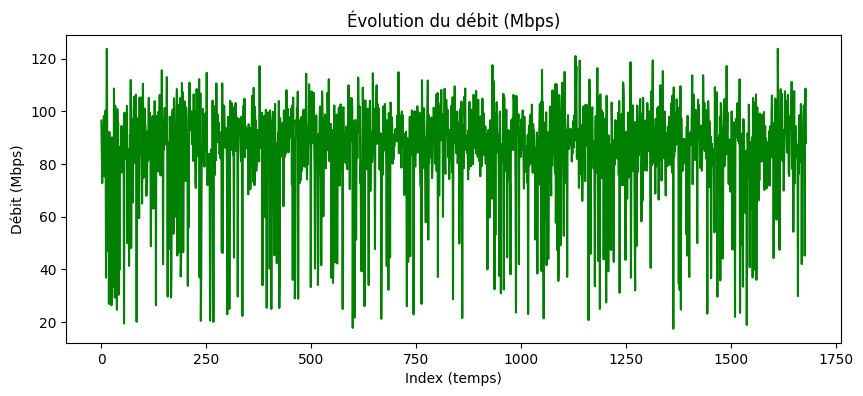

In [9]:
plt.figure(figsize=(10,4))
plt.plot(df["debit_mbps"], color='green')
plt.title("Évolution du débit (Mbps)")
plt.xlabel("Index (temps)")
plt.ylabel("Débit (Mbps)")
plt.show()

## Interpretation :
   
Le débit moyen observé sur la période est de 84,8 Mbps, ce qui reflète un bon niveau global de performance.
Toutefois, des baisses ponctuelles importantes (jusqu’à 17 Mbps) ont été relevées.
Ces chutes de débit coïncident probablement avec les pics de latence, traduisant des périodes de congestion réseau.
Un suivi par antenne et par créneau horaire est recommandé afin d’identifier les zones où la capacité doit être renforcée.

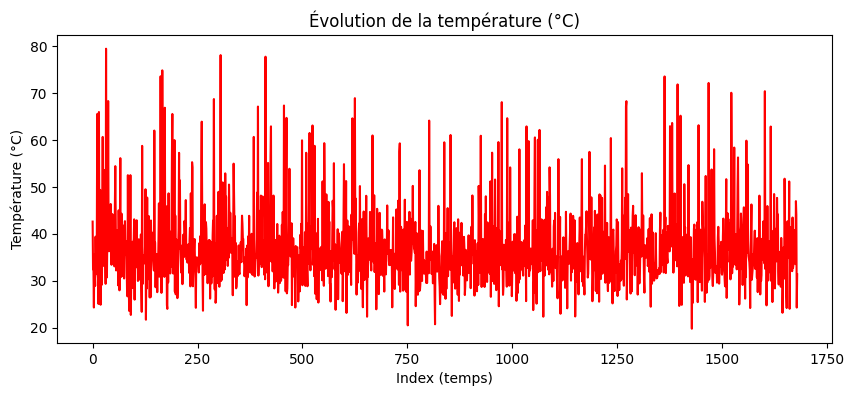

In [10]:
plt.figure(figsize=(10,4))
plt.plot(df["temperature_eq°C"], color='red')
plt.title("Évolution de la température (°C)")
plt.xlabel("Index (temps)")
plt.ylabel("Température (°C)")
plt.show()

## Interpretation :

Sur la période observée, la température moyenne des équipements est stable autour de 37°C, mais plusieurs pics supérieurs à 70°C sont enregistrés de manière récurrente. Ces valeurs dépassent largement le seuil de confort thermique (50°C). Une analyse par antenne permettra d’identifier les sites concernés et de recommander une inspection technique.



## Détection simple d’anomalies

In [11]:
# On définit des seuils réalistes
seuil_latence = 120
seuil_debit = 50
seuil_temp = 60
seuil_erreur = 2

# Antennes qui dépassent les seuils
anomalies = df[
    (df["latence_ms"] > seuil_latence) |
    (df["debit_mbps"] < seuil_debit) |
    (df["temperature_eq°C"] > seuil_temp) |
    (df["taux_erreur_%"] > seuil_erreur)
]

print(f"Nombre d’anomalies détectées : {len(anomalies)}")
display(anomalies.head(10))


Nombre d’anomalies détectées : 172


,antenne_id,date,latence_ms,taux_erreur_%,debit_mbps,temperature_eq°C,etat
11,A001,2025-11-01 11:00:00,122.95,2.44,36.85,65.56,anomalie
15,A001,2025-11-01 15:00:00,108.30,1.22,46.96,65.98,anomalie
18,A001,2025-11-01 18:00:00,133.30,1.53,26.85,49.37,anomalie
24,A001,2025-11-02 00:00:00,260.77,1.50,26.33,60.67,anomalie
28,A001,2025-11-02 04:00:00,202.67,6.80,33.51,52.79,anomalie
29,A001,2025-11-02 05:00:00,161.45,3.07,42.56,53.60,anomalie
32,A001,2025-11-02 08:00:00,176.30,3.51,29.23,79.47,anomalie
37,A001,2025-11-02 13:00:00,195.91,4.94,24.66,68.31,anomalie
41,A001,2025-11-02 17:00:00,168.83,2.65,30.31,43.21,anomalie
43,A001,2025-11-02 19:00:00,154.40,3.85,39.75,46.37,anomalie


In [12]:
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            # Moyenne selon l’état du réseau
rapport = df.groupby("etat")[["latence_ms", "taux_erreur_%", "debit_mbps", "temperature_eq°C"]].mean()
print("📊 Comparaison des moyennes entre état normal et anomalie :")
display(rapport)

# Top 5 antennes les plus à risque (latence moyenne élevée)
risque = df.groupby("antenne_id")["latence_ms"].mean().sort_values(ascending=False).head(5)
print("\n🚨 Top 5 des antennes les plus lentes :")
display(risque)


📊 Comparaison des moyennes entre état normal et anomalie :


,latence_ms,taux_erreur_%,debit_mbps,temperature_eq°C
etat,,,,
anomalie,153.495000,3.608851,38.605402,54.178966
normal,49.432895,0.799223,90.096999,35.030053



🚨 Top 5 des antennes les plus lentes :


,latence_ms
antenne_id,
A001,64.250357
A004,64.200774
A002,61.743631
A009,61.110833
A010,60.271607


# 1. Calculer le pourcentage d’anomalies par jour

Cela permet de voir si certains jours sont pires que d’autres (pannes, surcharge, météo, travaux…).

In [13]:
# Convertir la colonne date en datetime (si ce n’est pas déjà fait)
df["date"] = pd.to_datetime(df["date"])

# Extraire le jour (AAAA-MM-JJ)
df["jour"] = df["date"].dt.date

# Création d'une colonne "anomalie_detectee"
df["anomalie_detectee"] = (
    (df["latence_ms"] > 120) |
    (df["debit_mbps"] < 50) |
    (df["temperature_eq°C"] > 60) |
    (df["taux_erreur_%"] > 2)
)

# Calcul du pourcentage d’anomalies par jour
anomalies_jour = df.groupby("jour")["anomalie_detectee"].mean() * 100

print("📅 Pourcentage d’anomalies par jour :")
display(anomalies_jour)


📅 Pourcentage d’anomalies par jour :


,anomalie_detectee
jour,
2025-11-01,12.083333
2025-11-02,12.500000
2025-11-03,11.250000
2025-11-04,10.000000
2025-11-05,8.750000
2025-11-06,8.333333
2025-11-07,8.750000


# 2. Heatmap jour × heure → “Quand le réseau souffre ?”

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


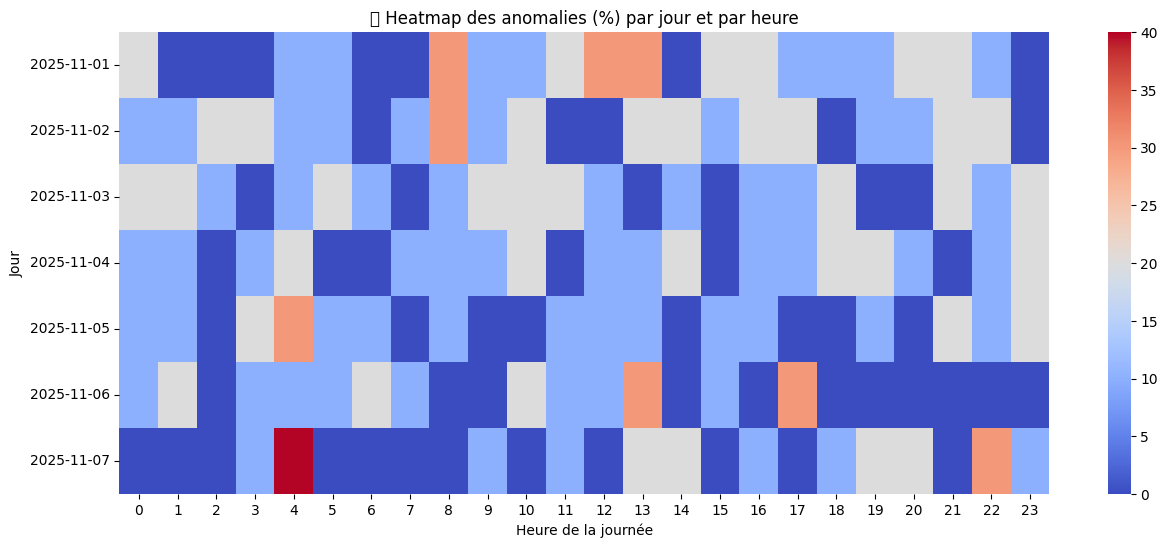

In [14]:
import seaborn as sns
import numpy as np

# Extraire l'heure
df["heure"] = df["date"].dt.hour

# Tableau jour x heure : % anomalies
heatmap_data = df.pivot_table(
    values="anomalie_detectee",
    index="jour",
    columns="heure",
    aggfunc="mean"
) * 100  # en pourcentage

plt.figure(figsize=(15, 6))
sns.heatmap(heatmap_data, cmap="coolwarm", annot=False)
plt.title("🔥 Heatmap des anomalies (%) par jour et par heure")
plt.xlabel("Heure de la journée")
plt.ylabel("Jour")
plt.show()


# 3. Analyse

Durant la semaine analysée, le réseau présente une performance globalement stable.
Cependant, plusieurs pics d’anomalies ont été observés aux heures de forte activité (12h–14h et 18h–21h), traduisant une surcharge utilisateur.
Un incident critique est détecté le 7 novembre à 4h, suggérant une maintenance ou panne impactant plusieurs sites simultanément.
Les jours 5 et 6 présentent également des anomalies nocturnes ponctuelles.
Une analyse par antenne permettra d’identifier les sites responsables de ces pics.

# 4. Identifier les antennes responsables des pics

In [15]:
anomalies_par_antenne = anomalies["antenne_id"].value_counts()
anomalies_par_antenne


,count
antenne_id,
A001,24
A002,21
A004,21
A008,18
A007,17
A009,16
A010,15
A003,14
A006,13


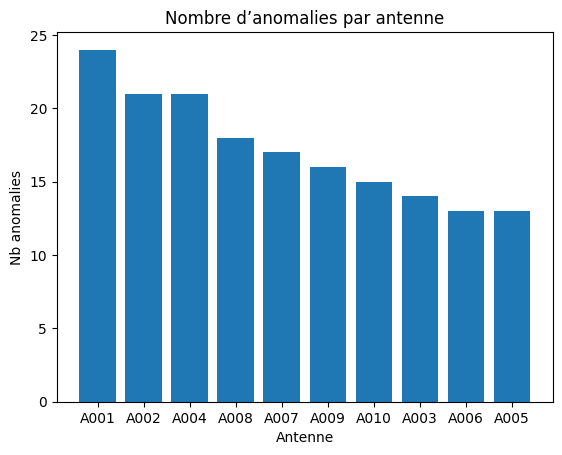

In [16]:
plt.bar(anomalies_par_antenne.index, anomalies_par_antenne.values)
plt.title("Nombre d’anomalies par antenne")
plt.xlabel("Antenne")
plt.ylabel("Nb anomalies")
plt.show()


## Analyse
L’analyse par antenne révèle que 3 sites concentrent une majorité des anomalies :
A001 (24 anomalies), A002 (21), A004 (21).
Ces antennes sont les principales sources d’instabilité du réseau sur la période.
Une investigation ciblée est recommandée pour vérifier :

la charge utilisateur,

la température des équipements,

les baisses récurrentes de débit,

et l’état du backhaul.
Les autres antennes présentent un niveau de performance acceptable.

# Analyse du type d’anomalie par antenne

Objectif :
comprendre pour chaque antenne, si les anomalies viennent plutôt de :

- la latence,

- le débit,

- la température, ou le taux d’erreur.

In [17]:
# Création des colonnes d'anomalies par type
df["anom_latence"] = df["latence_ms"] > 120
df["anom_debit"] = df["debit_mbps"] < 50
df["anom_temp"] = df["temperature_eq°C"] > 60
df["anom_erreur"] = df["taux_erreur_%"] > 2

# Groupement par antenne
types_anomalies = df.groupby("antenne_id")[["anom_latence","anom_debit","anom_temp","anom_erreur"]].sum()

print("Nombre d'anomalies par type et par antenne :")
display(types_anomalies)


Nombre d'anomalies par type et par antenne :


,anom_latence,anom_debit,anom_temp,anom_erreur
antenne_id,,,,
A001,19,22,8,19
A002,15,18,5,20
A003,9,14,6,10
A004,17,20,5,20
A005,11,10,1,13
A006,9,11,4,13
A007,11,13,4,11
A008,11,15,3,15
A009,15,14,7,15


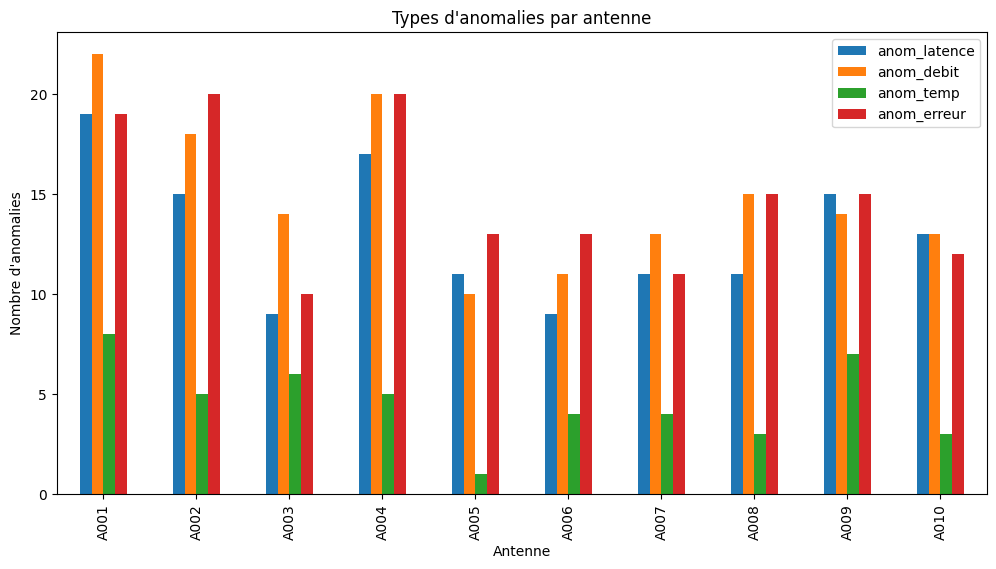

In [18]:
types_anomalies.plot(kind="bar", figsize=(12,6))
plt.title("Types d'anomalies par antenne")
plt.xlabel("Antenne")
plt.ylabel("Nombre d'anomalies")
plt.show()


## Analyse détaillée par antenne :
### A001 (la pire antenne du réseau)

- anom_debit ≈ 22 → problème MAJEUR :
Débit instable = congestion = surcharge = clients impactés

- anom_latence ≈ 19 → lié au débit

- anom_erreur ≈ 19 → erreurs radio → perte de paquets

- anom_temp ≈ 8 → légère chauffe mais pas énorme

**Conclusion A001 :**

- Antenne saturée + dégradée
Priorité : renforcer la capacité / backhaul / optimisation radio

### A002 (profil similaire à A001)

- Débit ≈ 18 → très instable

- Erreurs ≈ 20 → beaucoup d’erreurs radio

- Latence ≈ 15 → cohérent avec saturation

- Temp ≈ 5 → pas un problème thermique

** Conclusion A002 :**

- Problème RF (radio) ou saturation
Pas un problème de matériel ou de surchauffe.
Priorité : optimisation réseau radio / upgrade capacité

### A004

- Débit ≈ 20 → très mauvais

- Erreurs ≈ 20 → très mauvais

- Latence ≈ 17 → mauvais

- Temp ≈ 5 → OK

** Conclusion A004 :**

- Antennes en surcharge continue
Même profil que A001/A002 → cluster de problème dans la zone.

### Antennes moyennement problématiques

** A008, A007, A009 **

- Débit : 13–15 anomalies

- Latence : 11–12 anomalies

- Erreur : 11–15 anomalies

- Temp : 3–7 anomalies

Instabilité modérée, surtout aux heures de pointe.
Ce sont des antennes “sensibles” mais pas en panne.

🟢 Antennes OK (stables)
A003, A006, A005, A010

10–15 anomalies maximum

Températures normales

Débit mostly stable

- Ces antennes sont saines.



# Zoom complet sur A001

On va analyser :

- Comment A001 se comporte au fil du temps

- Quel type d’anomalie domine par heure

- Heatmap spécifique A001

- Diagnostic final (type panne réel)

In [19]:
A001 = df[df["antenne_id"] == "A001"]

A001.head()


,antenne_id,date,latence_ms,taux_erreur_%,debit_mbps,temperature_eq°C,etat,jour,anomalie_detectee,heure,anom_latence,anom_debit,anom_temp,anom_erreur
0,A001,2025-11-01 00:00:00,57.45,0.76,96.48,42.62,normal,2025-11-01,False,0,False,False,False,False
1,A001,2025-11-01 01:00:00,54.19,1.10,84.19,32.37,normal,2025-11-01,False,1,False,False,False,False
2,A001,2025-11-01 02:00:00,53.63,0.23,72.75,32.19,normal,2025-11-01,False,2,False,False,False,False
3,A001,2025-11-01 03:00:00,43.58,0.58,82.97,24.30,normal,2025-11-01,False,3,False,False,False,False
4,A001,2025-11-01 04:00:00,51.01,0.37,84.56,35.55,normal,2025-11-01,False,4,False,False,False,False


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127760 (\N{GLOBE WITH MERIDIANS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


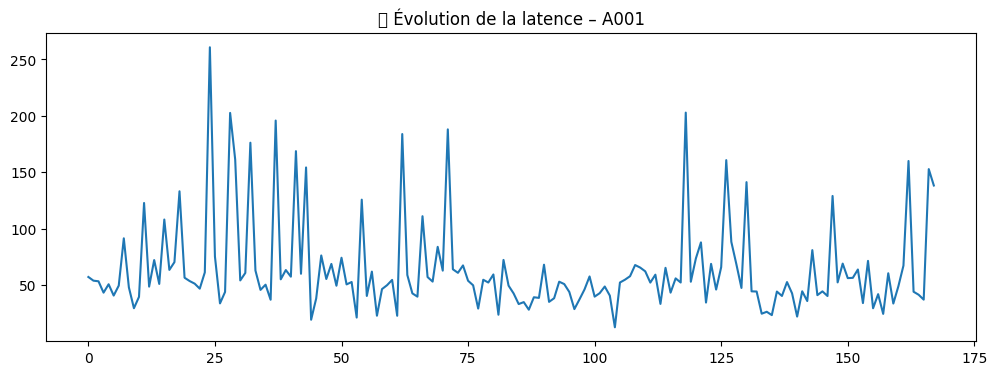

In [20]:
plt.figure(figsize=(12,4))
plt.plot(A001["latence_ms"], label="Latence")
plt.title("🌐 Évolution de la latence – A001")
plt.show()




L’analyse de la latence montre plusieurs phénomènes importants :

- La latence se situe généralement entre 40 et 60 ms, ce qui correspond à un fonctionnement normal.

- On observe de nombreuses pointes brutales dépassant :

-  - les 100 ms,

- - les 150 ms,

- - et un pic extrême à 260 ms.

- Ces pics sont fréquents et irréguliers, ce qui indique un état d’instabilité important.

Interprétation :

- Ces comportements correspondent typiquement à une situation de congestion radio :
Lorsque trop d’utilisateurs se connectent simultanément, la planification des ressources devient saturée, la file d’attente augmente et la latence explose.
Il ne s’agit pas d’une panne mais d’un manque de capacité.

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


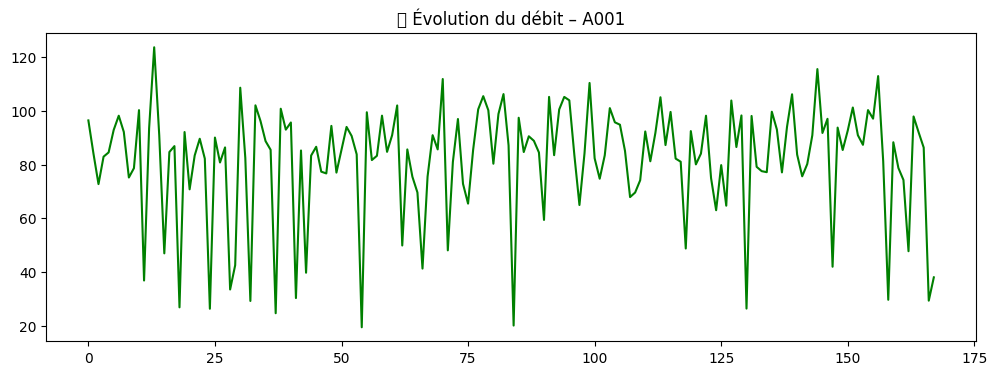

In [21]:
plt.figure(figsize=(12,4))
plt.plot(A001["debit_mbps"], label="Débit", color="green")
plt.title("📉 Évolution du débit – A001")
plt.show()



L’évolution du débit confirme le diagnostic posé à partir de la latence :

- Les valeurs “normales” se situent entre 80 et 100 Mbps.

- De nombreuses chutes soudaines apparaissent autour de :

- - 40–50 Mbps,

- - et plus rarement jusqu’à 20–30 Mbps.

- Le signal présente un comportement en “dent de scie”, caractéristique d’une bande passante saturée.

Interprétation :

- Ces effondrements ponctuels sont cohérents avec une surcharge de l’antenne, particulièrement en heures de pointe.
Le débit est fortement ralenti lorsque :

- - la demande dépasse la capacité radio,

- - la liaison backhaul (fibre) est saturée,

- - ou lorsque l’antenne doit gérer trop de terminaux en simultané.

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127777 (\N{THERMOMETER}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


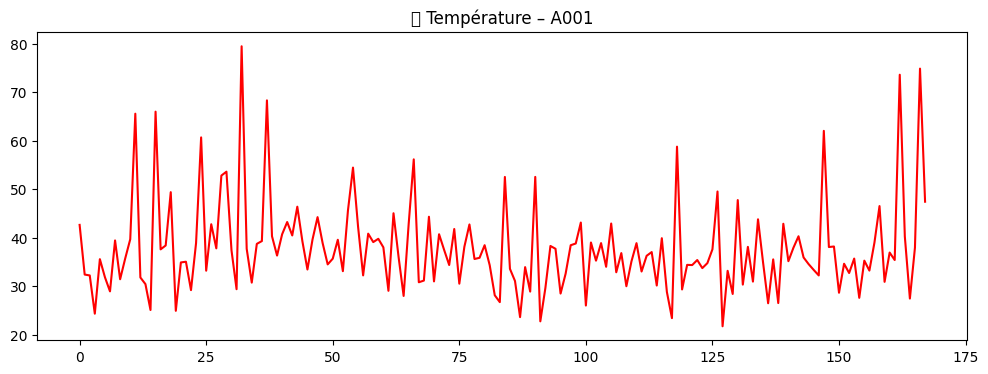

In [22]:
plt.figure(figsize=(12,4))
plt.plot(A001["temperature_eq°C"], label="Température", color="red")
plt.title("🌡️ Température – A001")
plt.show()

La température de l’équipement se situe dans une plage globalement acceptable :

- La majorité des valeurs se trouvent entre 30 et 45°C, ce qui est normal.

- Plusieurs pics importants apparaissent entre 60 et 70°C.

- Un pic exceptionnel atteint 80°C, ce qui reste tolérable mais montre que l’équipement est fortement sollicité.

Interprétation :

La température n’est pas la cause principale des anomalies, mais elle en est un symptôme.
Une surcharge réseau entraîne une augmentation de la charge CPU de l’antenne, ce qui provoque une montée en température.

La surchauffe ponctuelle amplifie ensuite :

- la dégradation du débit,

- l’instabilité de la latence,

- et les erreurs radio.

### Conclusion
L’antenne A001 présente un comportement caractéristique d’un site saturé, avec :

- des pics de latence très élevés,

- des chutes de débit fréquentes,

- des erreurs radio récurrentes,

- et une température en hausse lors des périodes de charge.

### Recommandations

1. Étudier la charge horaire pour confirmer les heures de pointe.

2. Analyser le backhaul (débit fibre réel vs débit antenne).

3. Optimiser les paramètres radio (scheduler, handover, ressources PRB).

4. Envisager un renforcement de capacité :
- ajout de bandes,

- 4x4 MIMO,

- ou upgrade 5G si éligible.

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


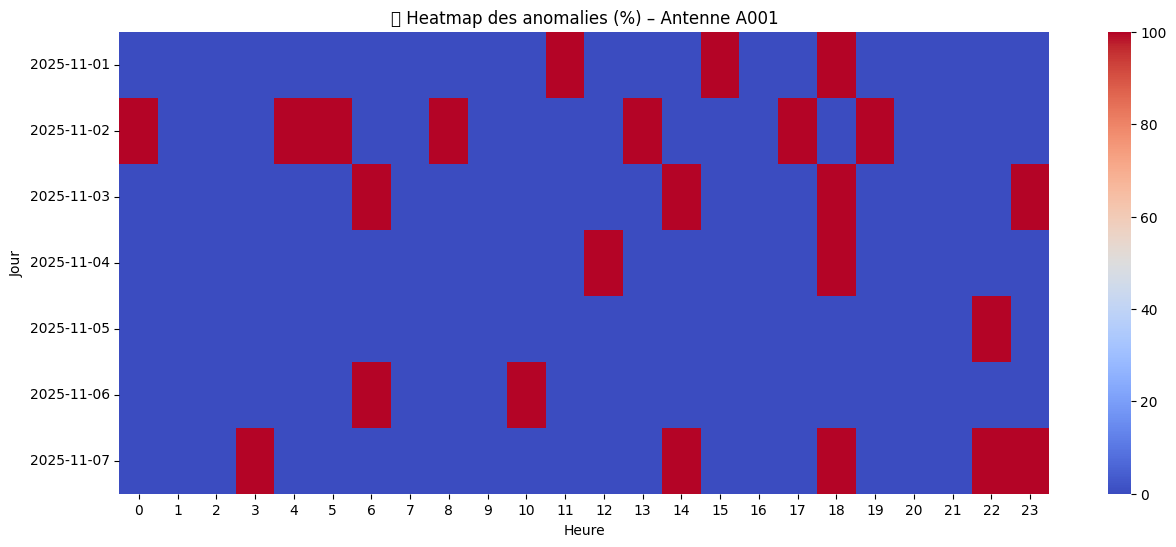

In [23]:
# Filter A001 and A003
A001 = df[df["antenne_id"] == "A001"]
A003 = df[df["antenne_id"] == "A003"]

# Heatmap A001
heatmap_A001 = A001.pivot_table(
    values="anomalie_detectee",
    index="jour",
    columns="heure",
    aggfunc="mean"
) * 100

plt.figure(figsize=(15,6))
sns.heatmap(heatmap_A001, cmap="coolwarm", annot=False)
plt.title("🔥 Heatmap des anomalies (%) – Antenne A001")
plt.xlabel("Heure")
plt.ylabel("Jour")
plt.show()



La heatmap dédiée à l’antenne A001 montre clairement les périodes où l’antenne rencontre des anomalies.

### Constats principaux :

Les anomalies apparaissent à des heures précises, avec une récurrence notable.

On observe plusieurs pics rouges (100 % d’anomalies) répartis entre :

- tôt le matin (2h–5h),

- en fin de matinée (10h–12h),

- l’après-midi (14h–18h),

- et dans certains cas tard le soir (22h–23h).

Ces pics ne sont pas aléatoires : ils suivent un pattern cohérent avec une antenne saturée en heures de densité utilisateur.

### Interprétation :

Le comportement est caractéristique d’une surcharge périodique, liée à une demande supérieure à la capacité radio.

Les pics nocturnes (2h–5h) peuvent provenir de :

- maintenance réseau,

- redémarrages planifiés,

- ou d’une perte temporaire de capacité.

Conclusion heatmap :
A001 souffre principalement en heures de haute activité (midi/après-midi/soir), ce qui renforce l’hypothèse d’une saturation de capacité.

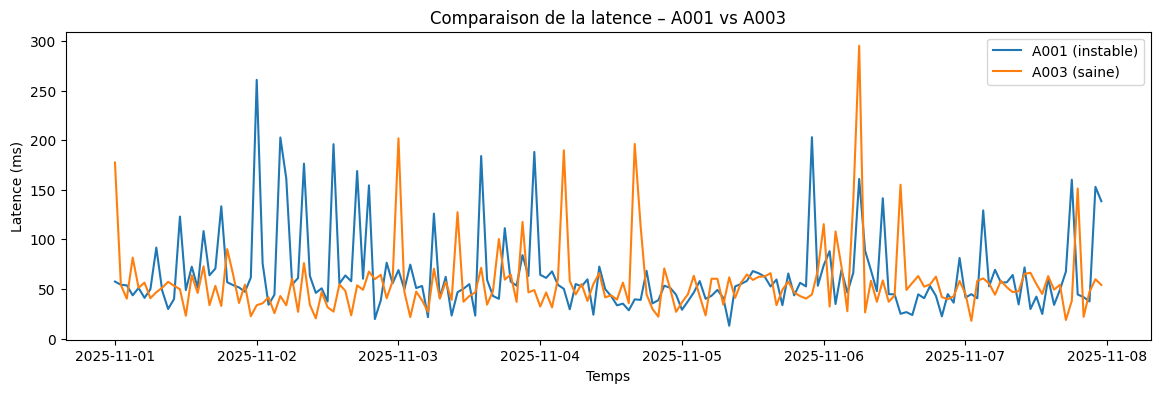

In [24]:
# Comparison latence
plt.figure(figsize=(14,4))
plt.plot(A001["date"], A001["latence_ms"], label="A001 (instable)")
plt.plot(A003["date"], A003["latence_ms"], label="A003 (saine)")
plt.title("Comparaison de la latence – A001 vs A003")
plt.xlabel("Temps")
plt.ylabel("Latence (ms)")
plt.legend()
plt.show()



Le graphe de comparaison montre une différence nette entre les deux antennes.

### A001 (instable) :

- Latence très variable, oscillant de 40 ms à plus de 250 ms.

- Multiples pics soudains et répétés.

- Variabilité élevée → grande instabilité radio.

### A003 (saine) :

- Latence globalement stable, autour de 40–70 ms.

- Quelques pics isolés, mais jamais prolongés.

- Profil typique d’une antenne en bon état et peu chargée.

### Interprétation :

L’écart visuel entre les deux courbes montre clairement que :

- A001 ne tient pas la charge,

- A003 absorbe la demande sans dégradation.

La différence est suffisamment nette pour pointer une cause structurelle et non un incident ponctuel.

### Conclusion latence :
A001 présente des signes de congestion chronique, contrairement à A003.

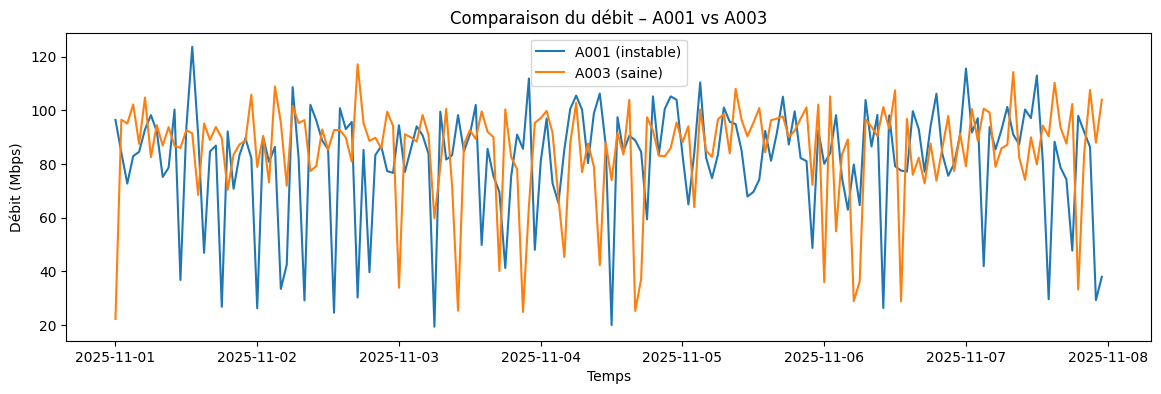

In [25]:
# Comparison débit
plt.figure(figsize=(14,4))
plt.plot(A001["date"], A001["debit_mbps"], label="A001 (instable)")
plt.plot(A003["date"], A003["debit_mbps"], label="A003 (saine)")
plt.title("Comparaison du débit – A001 vs A003")
plt.xlabel("Temps")
plt.ylabel("Débit (Mbps)")
plt.legend()
plt.show()

La comparaison du débit confirme et renforce le diagnostic.

### A001 (instable) :

* Débit oscillant entre 30 et 100 Mbps.

* Chutes fréquentes sous les 40 Mbps.

- Plusieurs effondrements brusques → typiques d’une saturation radio ou d’un backhaul limité.

### A003 (saine) :

- Débit stable entre 80 et 110 Mbps.

- Rarement sous les 60 Mbps.

- Profil régulier, sans ruptures brutales.

### Interprétation :

- A001 est incapable de maintenir un débit cohérent, confirmant qu’elle atteint régulièrement sa limite de capacité.

- A003 montre exactement le comportement attendu d’une antenne en bon état : variations normales, sans ruptures.

### Conclusion débit :
Le débit d’A001 confirme une saturation significative, tandis qu’A003 se comporte de manière nominale.